<a href="https://colab.research.google.com/github/leejunho12316/HonGongMachine/blob/main/AICE_Chapter_08_%EC%9D%98%EC%82%AC%EA%B2%B0%EC%A0%95%EB%82%98%EB%AC%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/국민건강보험공단_건강검진정보_20211231_수정.CSV', encoding='cp949')
sample_df = df[['신장(5cm단위)','성별','체중(5kg단위)','음주여부']]
sample_df.head(3)

,신장(5cm단위),성별,체중(5kg단위),음주여부
0,160,1,65,1.0
1,175,1,90,1.0
2,160,1,55,1.0


In [ ]:
sample_df = sample_df.dropna(axis=0)
#sample_df = sample_df.astype('str')
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999829 entries, 0 to 999999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   신장(5cm단위)  999829 non-null  int64  
 1   성별         999829 non-null  int64  
 2   체중(5kg단위)  999829 non-null  int64  
 3   음주여부       999829 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 38.1 MB


In [ ]:
X = sample_df.drop('음주여부', axis=1)
y = sample_df.음주여부

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state = 42, max_depth = 2)
dt_model = dt.fit(X_train, y_train)

print("정확도 : ", dt_model.score(X_train, y_train))
print("검증 정확도 : ", dt_model.score(X_test, y_test))

정확도 :  0.6897831253602179
검증 정확도 :  0.6901423241951131


In [ ]:
!pip install graphviz

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

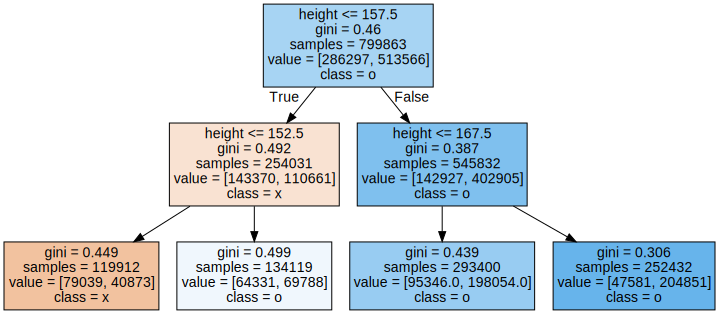

In [ ]:
tree_graph = graphviz.Source(export_graphviz(dt_model,
                                             class_names=['x','o'],
                                             feature_names=['height','sex','weight'],
                                             impurity=True,
                                             filled=True))
tree_graph

#지니 계수란?

In [35]:
bag1 = ['사과'] * 9
bag2 = ['사과','바나나','사과','바나나','바나나','바나나','복숭아','복숭아','복숭아']
bag3 = ['사과','바나나','사과','바나나','사과','복숭아','복숭아','사과','복숭아']

In [68]:
def gini(x):
  n = x.sum()

  gini_sum = 0

  for i in x.index:
    gini_sum = gini_sum + (x[i]/n)**2

  return 1-gini_sum



In [70]:
print(gini(pd.DataFrame(bag1).value_counts()))
print(gini(pd.DataFrame(bag2).value_counts()))
print(gini(pd.DataFrame(bag3).value_counts()))

0.0
0.6419753086419753
0.6419753086419753
